In [1]:
import numpy as np
import pandas as pd
from GTZAN import *
from constants import *
from preprocessing import *

## Save spectrograms

In [2]:
for s in ['jazz']:
    for n in range(10):
        spec = get_spec(filename_audio(s, n))
        np.save(filename_spec(s, n), spec)
        print(filename(s, n))

jazz.00000
jazz.00001
jazz.00002
jazz.00003
jazz.00004
jazz.00005
jazz.00006
jazz.00007
jazz.00008
jazz.00009


## Save onsets and beats

In [3]:
for s in ['jazz']:
    for n in range(10):
        spec = np.load(filename_spec(s, n)).T
        beats_times = load_beats(s, n)
        df = get_onsets(spec, beats_times)
        df.to_csv(filename_onset(s, n), index=False)
        print(filename(s, n))

jazz.00000
jazz.00001
jazz.00002
jazz.00003
jazz.00004
jazz.00005
jazz.00006
jazz.00007
jazz.00008
jazz.00009


## Example

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

In [11]:
s = 'jazz'
n = np.random.randint(10)
print(filename(s, n))

jazz.00009


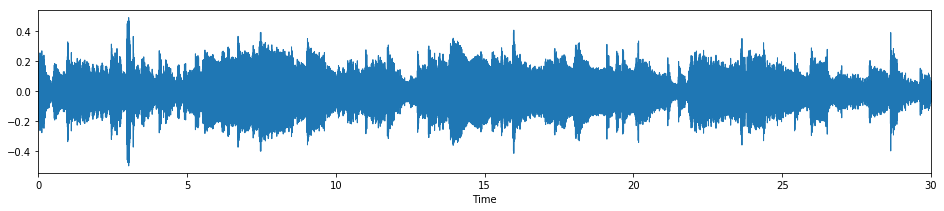

In [12]:
wav = librosa.load(filename_audio(s, n), sr)[0]
plt.figure(figsize=(16, 3))
librosa.display.waveplot(wav, sr);
Audio(wav, rate=sr)

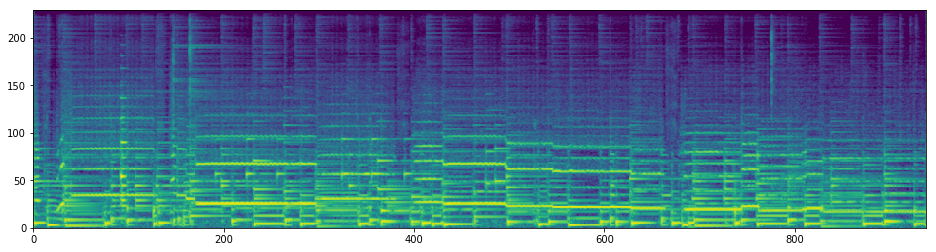

In [13]:
spec = np.load(filename_spec(s, n)).T
plt.figure(figsize=(16, 4))
plt.pcolormesh(spec);

In [14]:
df = pd.read_csv(filename_onset(s, n))
onsets = df.onsets.values
onsets_selected = onsets[df.isbeat.values == 1]
onsets_times = librosa.frames_to_time(onsets, sr, hl)
onsets_selected_times = librosa.frames_to_time(onsets_selected, sr, hl)
beats_times = load_beats(s, n)
onset_envelope = librosa.onset.onset_strength(S=spec)
onset_envelope = onset_envelope / onset_envelope.max()
times = librosa.frames_to_time(np.arange(len(onset_envelope)), sr, hl)

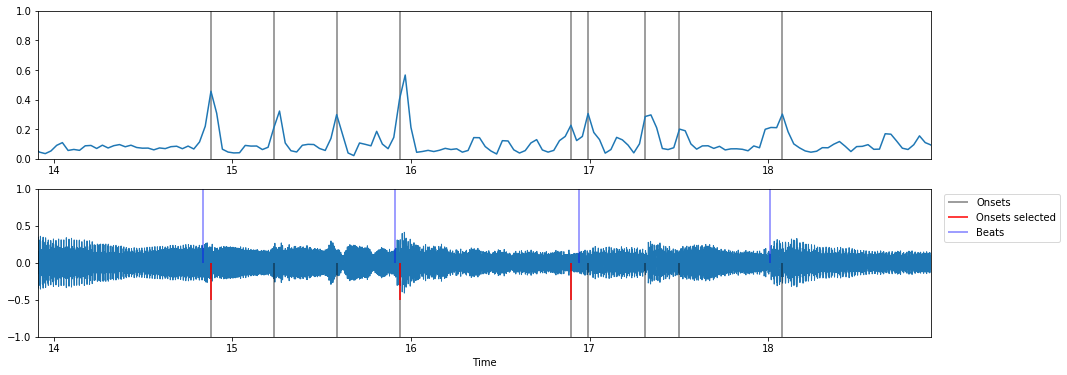

In [15]:
duration = 5
offset = np.random.rand() * (30 - duration)
plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 1)
plt.plot(times, onset_envelope)
plt.vlines(onsets_times, 0, 1, color='k', alpha=0.5)
plt.ylim(0, 1)
plt.xlim(offset, offset + duration)
plt.subplot(2, 1, 2)
librosa.display.waveplot(wav, sr)
plt.vlines(onsets_times, -1, 0, color='k', alpha=0.5, label='Onsets')
plt.vlines(onsets_selected_times, -0.5, 0, color='r', label='Onsets selected')
plt.vlines(beats_times, 0, 1, color='b', alpha=0.5, label='Beats')
plt.ylim(-1, 1)
plt.xlim(offset, offset + duration)
plt.legend(frameon=True, framealpha=0.75, bbox_to_anchor=(1.15, 1));